You are a data analyst for an e-commerce company that collects thousands of customer reviews. Your goal is to uncover actionable insights by analyzing this unstructured text data. 
Specifically, you need to:
1. Determine the overall sentiment (positive, neutral, negative) of the reviews.
2. Identify common themes such as frequently mentioned product features or issues.
3. Recommend actionable improvements to enhance customer satisfaction based on your analysis.

In [14]:
## TODO 1 : Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter

# Download NLTK resources
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
## TODO 2 : Load, clean and preprocess the raw review data from the CSV file.
# Load dataset
url = "https://gitlab.crio.do/me_notebook/me_jupyter_amazonfeedbackanalysis/-/raw/master/amazon_product_reviews.csv"
df = pd.read_csv(url)

# Drop missing reviews
df = df.dropna(subset=['reviews.text'])

# Convert to lowercase and clean text
df['clean_review'] = df['reviews.text'].astype(str).str.lower().str.strip()
def clean_text(text):
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_review'] = df['clean_review'].apply(clean_text)


Total Reviews: 3076
Average Review Length (words): 32.45058517555267


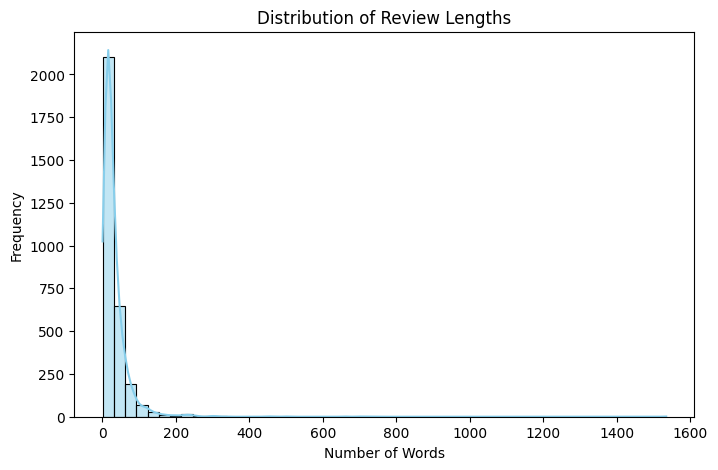

/tmp/ipykernel_98/2929153196.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='reviews.rating', data=df, palette='Set2')


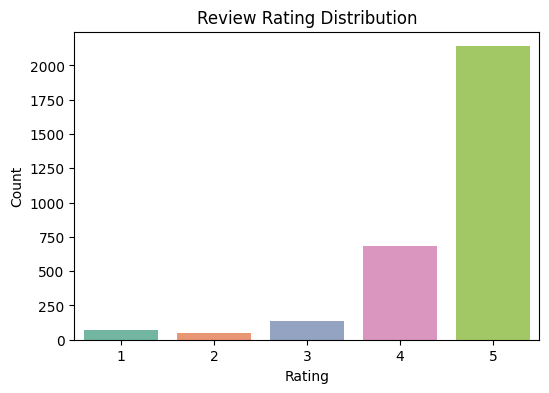

In [18]:
## TODO 3 : Perform exploratory data analysis (EDA) and visualize key trends using Matplotlib/Seaborn.
# Total reviews
print("Total Reviews:", len(df))

# Review length in words
df['review_length'] = df['clean_review'].apply(lambda x: len(x.split()))
print("Average Review Length (words):", df['review_length'].mean())

# Distribution of review lengths
plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Review Rating Distribution (if available)
if 'reviews.rating' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='reviews.rating', data=df, palette='Set2')
    plt.title("Review Rating Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Count")
    plt.show()


/tmp/ipykernel_98/715933871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2')


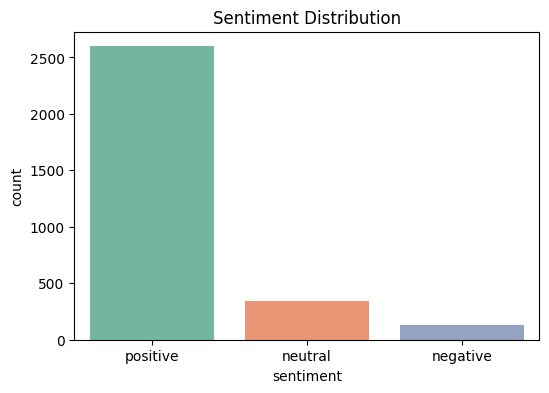

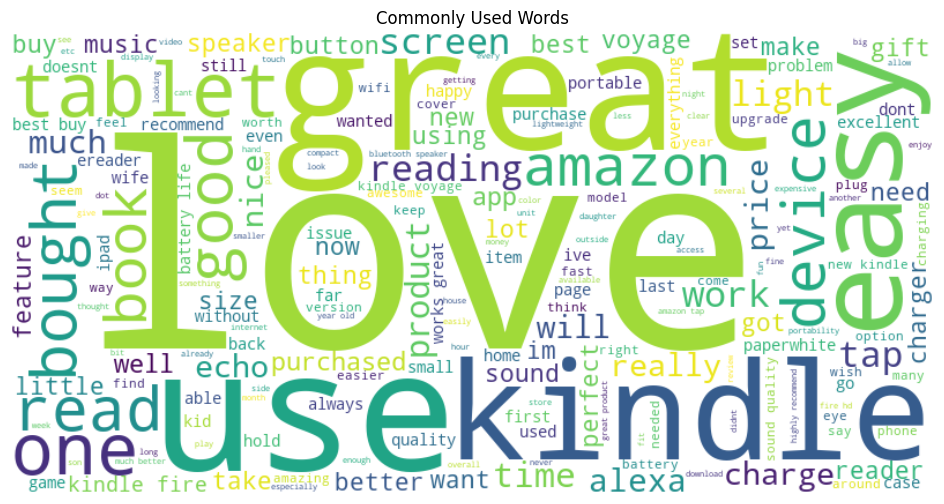

In [19]:
## TODO 4 : Do sentiment/text analysis on feedback column using prompts and create a wordcloud for the most repeated feedback.
# Sentiment Analysis using TextBlob
df['sentiment_score'] = df['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Sentiment Distribution Plot
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.show()

# WordCloud for all reviews
all_text = " ".join(df['clean_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Commonly Used Words")
plt.show()


/tmp/ipykernel_98/1541215687.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=top_words, palette='Reds_r')


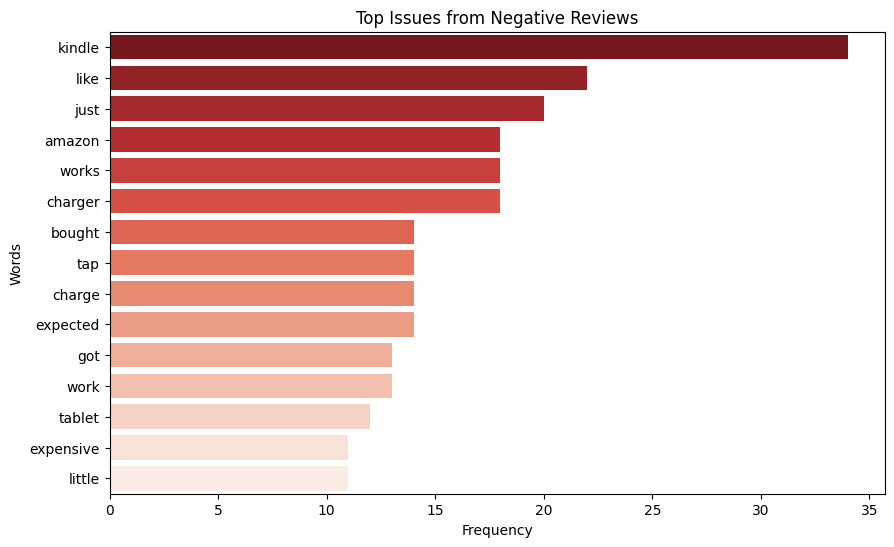

In [21]:
## TODO 5 : Creat a barplot showing the most frequent words in negative reviews
# Filter negative reviews
negative_reviews = df[df['sentiment'] == 'negative']

# CountVectorizer for top 15 words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(negative_reviews['clean_review'])
word_counts = np.array(X.sum(axis=0))[0]
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'word': words, 'count': word_counts})
top_words = word_freq_df.sort_values(by='count', ascending=False).head(15)

# Horizontal Bar Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=top_words, palette='Reds_r')
plt.title("Top Issues from Negative Reviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()
